In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<a id='model'></a>
# Build Model

> <ul>
    <li>Idea: using different model to predict if we can get positive response from the customer.</li>
    <li>Target label: success -- times of positive responses for one contact</li>
    <li>Feature: calls_time(the differece between starting time and ending time), events_time, activity_action(times of activities)</li>
    <li>Goal: after running the model, we can predict if the customer is positive. If it is positive, then the customer is in our potential customer list.</li>
    </ul>

In [9]:
model_data = pd.read_csv("../data/model_data.csv")
del model_data["Unnamed: 0"]
list(model_data.columns)

['total_no_success',
 'total_success',
 'total_calls_count',
 'diff_most_least_recent_call',
 'average_time_between_calls',
 'attended_event',
 'email_click',
 'email_open',
 'form_fill',
 'known_web_visit',
 'total_activity_count',
 'diff_most_least_recent_event',
 'average_time_between_event',
 'most_recent_call_event_diff',
 'job_level_C-Level',
 'job_level_Director',
 'job_level_Manager',
 'job_level_Other',
 'job_level_Senior',
 'job_level_Staff',
 'job_level_Vice President',
 'job_function_Accounting',
 'job_function_Administrative',
 'job_function_Arts and Design',
 'job_function_Business Development',
 'job_function_Consulting',
 'job_function_Customer Service & Support',
 'job_function_Education',
 'job_function_Engineering',
 'job_function_Finance',
 'job_function_Healthcare Services',
 'job_function_Human Resources',
 'job_function_Information Technology',
 'job_function_Legal',
 'job_function_Management',
 'job_function_Marketing',
 'job_function_Media & Communications',
 '

In [10]:
X = model_data.drop(["successful_call", 'total_no_success', 'total_success'], axis=1)
y = model_data.successful_call.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

## Model Building Process
We apply 7 Classification Predictor Algorithms to our predictive model as the list below. Then use 10-fold to get cross validation score and do the model validation.

1. KNN
2. Logistic Regression
3. SVM
4. Decision Tree
5. Random Forest
6. AdaBoost
7. XGBoost
8. LightGBM Classifier

In [11]:
#The code for the below matrix is taken from sklearn documentation
#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['Success','Failure']

kNN Accuracy is 0.61
kNN Cross Validation Score = 0.61
              precision    recall  f1-score   support

           0       0.64      0.84      0.72      2695
           1       0.50      0.26      0.34      1724

    accuracy                           0.61      4419
   macro avg       0.57      0.55      0.53      4419
weighted avg       0.59      0.61      0.57      4419



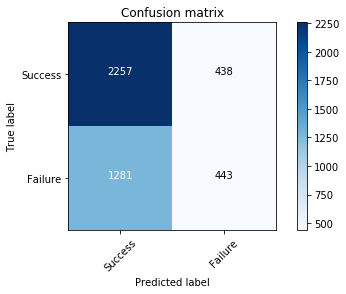

/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy is 0.64


/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

Logistic Regression Cross Validation Score = 0.64
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      2695
           1       0.56      0.32      0.41      1724

    accuracy                           0.64      4419
   macro avg       0.61      0.58      0.57      4419
weighted avg       0.62      0.64      0.61      4419



/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


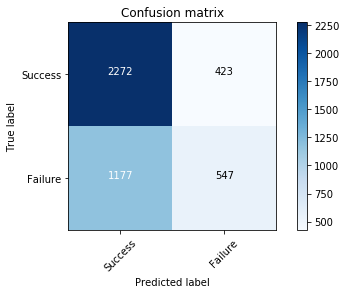

Decision Tree Accuracy is 0.61
Decision Tree Cross Validation Score = 0.61
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      2695
           1       0.50      0.61      0.55      1724

    accuracy                           0.61      4419
   macro avg       0.61      0.61      0.61      4419
weighted avg       0.63      0.61      0.62      4419



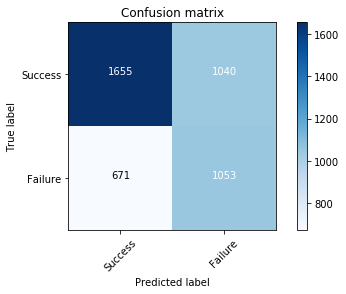

Random Forest Accuracy is 0.65


In [ ]:
def run_exps(X_train, y_train, X_test, y_test, models, class_names):
    models = models
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    for name, model in models:
        clf = model.fit(X_train, y_train)
        print ("%s Accuracy is %2.2f" % (name, accuracy_score(y_test, clf.predict(X_test))))
        y_pred = clf.predict(X_test)
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
        score = cross_val_score(clf, X, y, cv=kfold).mean()
        print("%s Cross Validation Score = %2.2f" % (name, score))
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        #Defining the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        #Plotting the confusion matrix
        plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')
        plt.show()
        print("========================================================================")

models =   [('kNN', KNeighborsClassifier(n_neighbors = 6)), 
            ('Logistic Regression', LogisticRegression()), 
            ('Decision Tree', tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)), 
            ('Random Forest', RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")),
            ('AdaBoost', AdaBoostClassifier(n_estimators=400, learning_rate=0.1))
#       ('KNN', KNeighborsClassifier()),
#       ('SVM', SVC()), 
#       ('GNB', GaussianNB()),
#       ('XGB', XGBClassifier())
    ]
run_exps(X_train, y_train, X_test, y_test, models, class_names)


In [ ]:

#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')